In [62]:
from river import datasets
from river import evaluate
from river import forest
from river import metrics

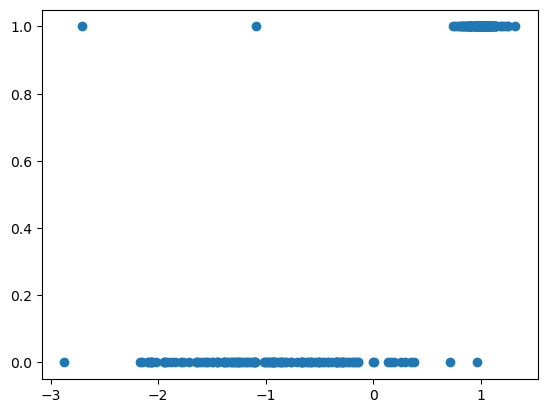

In [63]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

N = 250

X, y = make_classification(n_samples=N, n_features=1, n_informative=1, n_redundant=0, 
                           n_classes=2, n_clusters_per_class=1, random_state=2024)


plt.scatter(X, y)

In [64]:
model = forest.AMFClassifier(
    n_estimators=10,
    use_aggregation=False,
    dirichlet=0.5,
    seed=1
)
for obj, lab in zip(X, y):
    river_obj = {'x1': obj}
    model.predict_proba_one(river_obj)
    model.learn_one(river_obj, lab)

In [73]:
idx = np.random.permutation(range(N))
model_perm = forest.AMFClassifier(
    n_estimators=10,
    use_aggregation=False,
    dirichlet=0.5,
    seed=1
)
for obj, lab in zip(X[idx], y[idx]):
    river_obj = {'x1': obj}
    model_perm.predict_proba_one(river_obj)
    model_perm.learn_one(river_obj, lab)

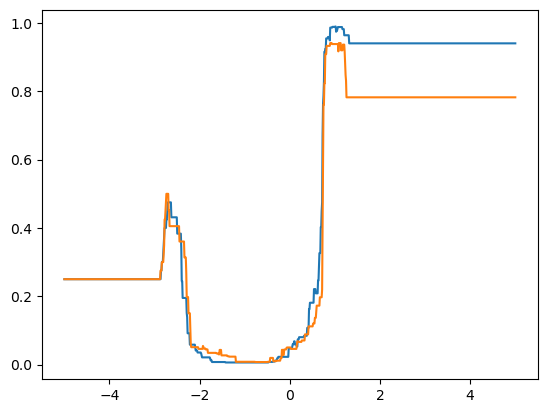

In [74]:
xrange = np.linspace(-5, 5, num=1000)
plt.plot(
    xrange,
    [model.predict_proba_one({'x1': x})[1] for x in xrange]
)
plt.plot(
    xrange,
    [model_perm.predict_proba_one({'x1': x})[1] for x in xrange]
)